In [21]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("E:\\Projects\\HR_Attrition_Analysis\\data\\HR-Employee-Attrition.csv")
print(f"Shape: {df.shape}")
print(df.info())

Shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLev

In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [30]:
# df.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"], axis=1, inplace=True)
df.to_csv("HR_Attrition_Cleaned.csv", index=False)

In [5]:
df['Attrition'].value_counts()
attrition_rate = df['Attrition'].value_counts(normalize=True).round(3)*100.
print(attrition_rate)

Attrition
No     83.9
Yes    16.1
Name: proportion, dtype: float64


### Attrition count by Gender

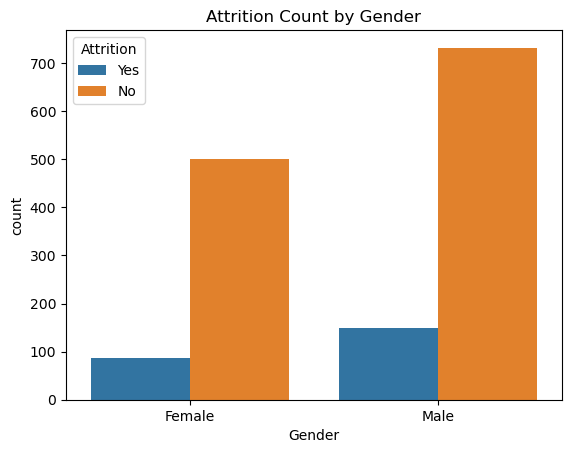

In [6]:
sns.countplot(data=df,x="Gender", hue="Attrition")
plt.title("Attrition Count by Gender")
plt.savefig("E:/Projects/HR_Attrition_Analysis/output/By_Gender.jpg")
plt.show()

### Attrition count by Department

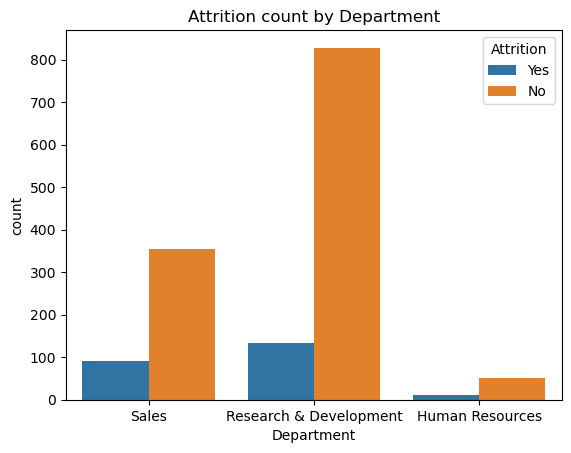

In [7]:
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title("Attrition count by Department")
plt.savefig("E:/Projects/HR_Attrition_Analysis/output/By_Dept.jpg")
plt.show()

### Attrition count by Age

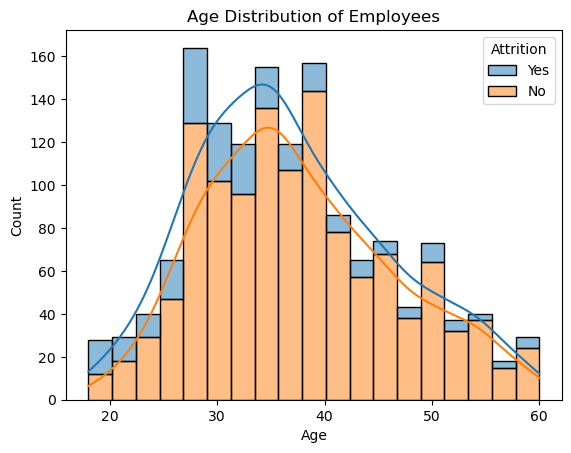

In [8]:
sns.histplot(data=df, x="Age", hue="Attrition",multiple="stack", kde=True)
plt.title('Age Distribution of Employees')
plt.savefig("E:/Projects/HR_Attrition_Analysis/output/By_Age.jpg")
plt.show()

### Attrition by Overtime

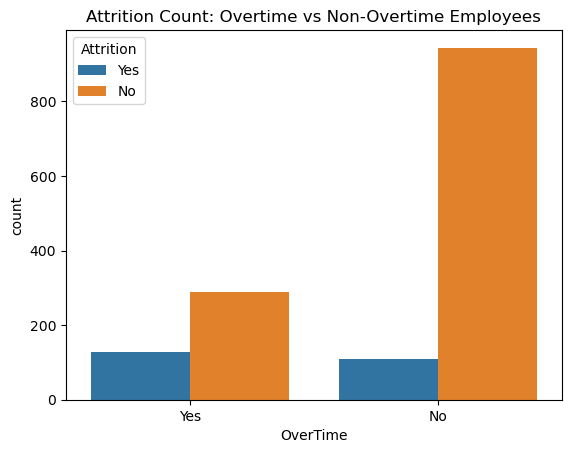

In [9]:
sns.countplot(data=df, x="OverTime", hue="Attrition")
plt.title("Attrition Count: Overtime vs Non-Overtime Employees")
plt.savefig("E:/Projects/HR_Attrition_Analysis/output/By_OverTime.jpg")
plt.show()

### Attrition by Distance from Home

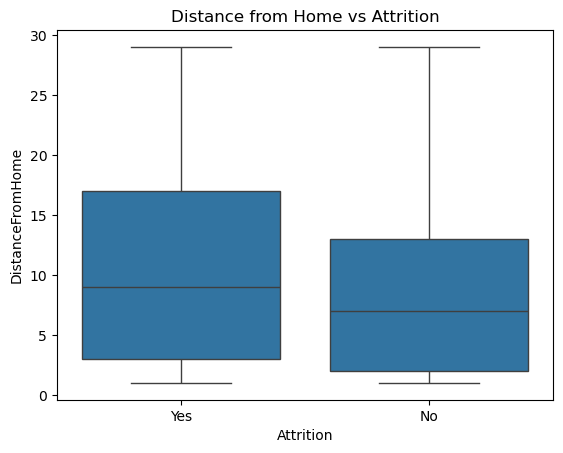

In [10]:
sns.boxplot(data=df,y="DistanceFromHome",x="Attrition")
plt.title('Distance from Home vs Attrition')
plt.savefig("E:/Projects/HR_Attrition_Analysis/output/By_DistanceFromHome.jpg")
plt.show()

### Attrition count by Job Role

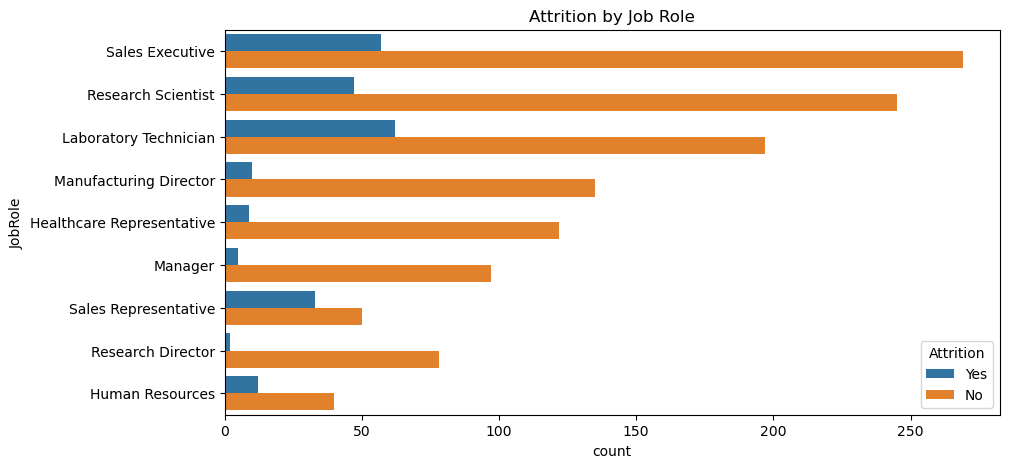

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.savefig("E:/Projects/HR_Attrition_Analysis/output/By_JobRole.jpg", dpi=200)
plt.show()

### Visualize Attrition by Department (In percentage)

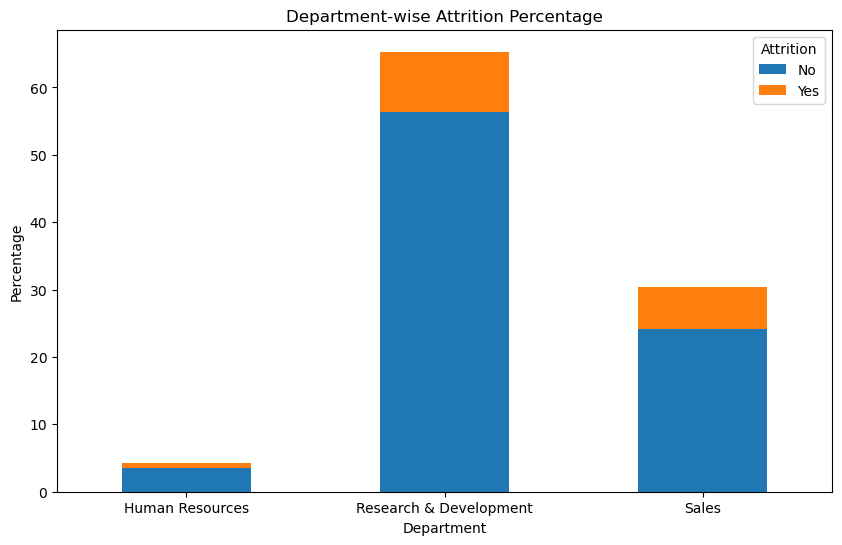

In [12]:
dept_attrition = pd.crosstab(df["Department"],df["Attrition"], normalize = True).round(3)*100
dept_attrition.plot(kind="bar",stacked=True,figsize=(10,6))
plt.title('Department-wise Attrition Percentage')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.savefig("E:/Projects/HR_Attrition_Analysis/output/By_Dept_InPercent.jpg")
plt.show()

## Key Insights and Hypotheses

**H1:** Employees living farther from office tend to leave more (Distance from Home as a key factor).  
**H2:** Overtime is strongly linked with higher attrition.  
**H3:** Junior job roles (Lab Technician, Sales Executive, Research Scientist) show higher attrition rates.  
**H4:** Gender has minimal impact on attrition.

These preliminary hypotheses were formed based on EDA visualizations and observed patterns.

### Validation of these hypotheses

### H1

In [24]:
from scipy.stats import ttest_ind
Dist_yes = df[df["Attrition"]=='Yes']["DistanceFromHome"]
Dist_no = df[df["Attrition"]=='No']["DistanceFromHome"]

# t_test
t_stat, p_val =ttest_ind(Dist_yes,Dist_no,equal_var=False)
print(f"t-statistics:{t_stat:.3f}")
print(f"p-value:{p_val:.3f}")

t-statistics:2.888
p-value:0.004


### H2

In [25]:
from scipy.stats import chi2_contingency
overtime_table = pd.crosstab(df["OverTime"], df["Attrition"])

# chi-square test
chi2, p, dof, expected = chi2_contingency(overtime_table)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.5f}")

Chi-Square Statistic: 87.564
P-value: 0.00000


### H3

In [27]:
role_attrition = df[df['Attrition'] == 'Yes']['JobRole'].value_counts(normalize=True).round(3) * 100
display(role_attrition.sort_values(ascending=False))

JobRole
Laboratory Technician        26.2
Sales Executive              24.1
Research Scientist           19.8
Sales Representative         13.9
Human Resources               5.1
Manufacturing Director        4.2
Healthcare Representative     3.8
Manager                       2.1
Research Director             0.8
Name: proportion, dtype: float64

### H4

In [28]:
from scipy.stats import chi2_contingency

gender_table = pd.crosstab(df['Gender'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(gender_table)

print(f"P-value (Gender vs Attrition): {p:.5f}")

P-value (Gender vs Attrition): 0.29057
